<a href="https://colab.research.google.com/github/supriyabaghel46/personal-finance-tracker/blob/main/tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
import os
os.listdir('/content/drive/My Drive/personal_finance_tracker')

['bank_statement.csv']

In [ ]:
df=pd.read_csv('/content/drive/My Drive/personal_finance_tracker/bank_statement.csv')

In [ ]:
df.head()

,Date,Description,Amount,Type
0,2025-06-01,Amazon Shopping,1500,Debit
1,2025-06-02,Uber,250,Debit
2,2025-06-02,Salary,20000,Credit
3,2025-06-03,zomato,367,Debit
4,2025-06-04,ola,193,Debit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         23 non-null     object
 1   Description  23 non-null     object
 2   Amount       23 non-null     int64 
 3   Type         23 non-null     object
dtypes: int64(1), object(3)
memory usage: 868.0+ bytes


In [ ]:
df.describe()

,Amount
count,23.000000
mean,1684.260870
std,4137.073826
min,56.000000
25%,223.500000
50%,500.000000
75%,994.500000
max,20000.000000


In [ ]:
df.isnull().sum()

,0
Date,0
Description,0
Amount,0
Type,0


In [ ]:
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df['Amount'] = pd.to_numeric(df['Amount'])

In [ ]:
df['Type']= df['Type'].str.capitalize()

In [ ]:
df = pd.read_csv('/content/drive/My Drive/personal_finance_tracker/bank_statement.csv')


In [ ]:
df['Description']= df['Description'].str.strip()

In [ ]:
df.head()

,Date,Description,Amount,Type
0,2025-06-01,Amazon Shopping,1500,Debit
1,2025-06-02,Uber,250,Debit
2,2025-06-02,Salary,20000,Credit
3,2025-06-03,zomato,367,Debit
4,2025-06-04,ola,193,Debit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         23 non-null     object
 1   Description  23 non-null     object
 2   Amount       23 non-null     int64 
 3   Type         23 non-null     object
dtypes: int64(1), object(3)
memory usage: 868.0+ bytes


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         23 non-null     datetime64[ns]
 1   Description  23 non-null     object        
 2   Amount       23 non-null     int64         
 3   Type         23 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 868.0+ bytes


In [ ]:
df.isnull().sum()

,0
Date,0
Description,0
Amount,0
Type,0


In [ ]:
category={
    'transport': ['petrol', 'uber', 'ola'],
    'shopping' : ['amazon shopping', 'myntra', 'shopping'],
    'food' :['zomato','grocery','food','beer','fruits','dryfruits','street food','cafe','snacks'],
    'salary' :['salary','bonus'],
    'refund' :['refund']
}

In [ ]:
def categorize(description):
  description = description.lower()
  for cat, keywords in category.items():
    for keyword in keywords:
       if keyword in description:
          return cat
  return 'other'


In [ ]:
df['category'] = df['Description'].apply(categorize)

In [ ]:
df[['category','Description']]

,category,Description
0,shopping,Amazon Shopping
1,transport,Uber
2,salary,Salary
3,food,zomato
4,transport,ola
5,food,grocery
6,food,food
7,food,beer
8,other,stationary
9,shopping,refund myntra


In [ ]:
category_summarize = df.groupby('category')['Amount'].sum()
print(category_summarize)

category
food          5091
other         2444
salary       25000
shopping      4840
transport     1363
Name: Amount, dtype: int64


In [ ]:
type_summarize = df.groupby('Type')['Amount'].sum()
print(type_summarize)

Type
Credit    26000
Debit     12738
Name: Amount, dtype: int64


In [ ]:
df['month']= df['Date'].dt.month

In [ ]:
month_summary = df.groupby('month')['Amount'].sum()

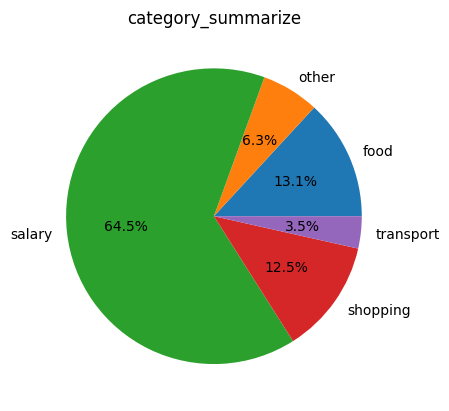

In [ ]:
import matplotlib.pyplot as plt
category_summarize.plot(kind='pie', autopct='%1.1f%%')
plt.title('category_summarize')
plt.ylabel('')
plt.show()

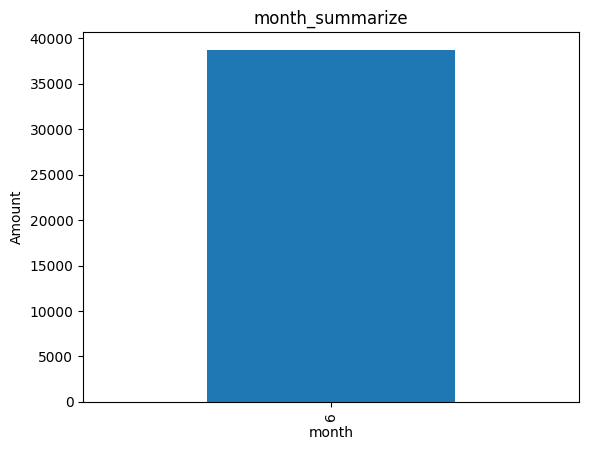

In [ ]:
month_summary.plot(kind='bar')
plt.title('month_summarize')
plt.xlabel('month')
plt.ylabel('Amount')
plt.show()

In [ ]:
total_credit = df[df['Type']=='Credit']['Amount'].sum()
total_debit = df[df['Type']=='Debit']['Amount'].sum()
total_saving=total_credit-total_debit
print(total_saving)

13262


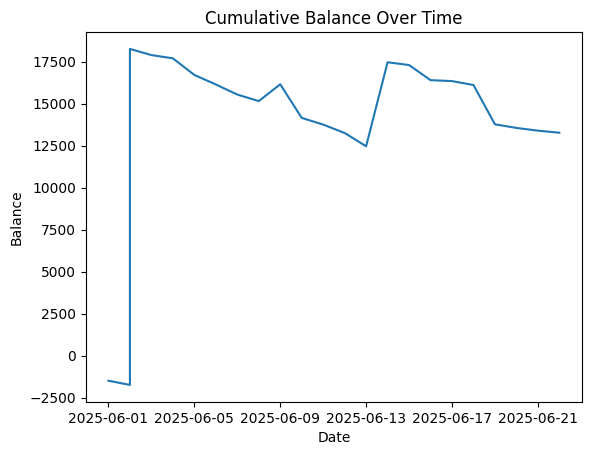

In [ ]:
df['Balance'] = df['Amount'].where(df['Type']=='Credit', -df['Amount']).cumsum()

import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Balance'])
plt.title('Cumulative Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.show()
